# SIEMENS

In [39]:
# MAB_ELE_PRO -> productions
# MAB_ELE_SHP -> shipments
# 156 - China
# 250 - France
# 276 - Germany
# 380 - Italy
# 392 - Japan
# 756 - Switzerland
# 826 - United Kingdom
# 840 - United States
# 1100 - Europe

# RohiBASEMET1000_org - world: price of base metals
# RohiENERGY1000_org - world: price of energy 
# RohiMETMIN1000_org - world: price of metal and minerals 
# RohiNATGAS1000_org - world: price of natural gas
# RohCRUDE_PETRO1000_org - world: price of crude oil
# RohCOPPER1000_org - world: price of copper

# WKLWEUR840_org - United States: EUR in LCU 

# Producer prices
# PRI27840_org - US eletrical equipment
# PRI27826_org - UK eletrical equipment
# PRI27380_org - Italy eletrical equipment
# PRI27250_org - France eletrical equipment
# PRI27276_org - Germany eletrical equipment
# PRI27156_org - China eletrical equipment

# Production index
# PRO28840_org - US: Machinery and equipment n.e.c.
# PRO281000_org - World: Machinery and equipment n.e.c.
# PRO28756_org - Switzerland: Machinery and equipment n.e.c.
# PRO28826_org - Uk: Machinery and equipment n.e.c.
# PRO28380_org - Italy: Machinery and equipment n.e.c.
# PRO28392_org - Japan: Machinery and equipment n.e.c.
# PRO28250_org - France: Machinery and equipment n.e.c.
# PRO28276_org - Germanny: Machinery and equipment n.e.c.
# PRO27840_org - US: Electrical equipment
# PRO271000_org - World: Electrical equipment
# PRO27756_org - Switzerland: Electrical equipment
# PRO27826_org - Uk: Electrical equipment
# PRO27380_org - Italy: Electrical equipment
# PRO27392_org - Japan: Electrical equipment
# PRO27250_org - France: Electrical equipment
# PRO27276_org - Germany: Electrical equipment

# Index 2010=100 (if not otherwise noted)


In [40]:
# Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import ticker
import seaborn as sns
import joypy
import category_encoders as ce
import collections
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

In [41]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
# Global definitions
baseFolder = os.getcwd()
exportsFolder = baseFolder + os.sep +'Exports' + os.sep

In [43]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

plots_barTexts_fontSize = 8

## Data Understanding

In [44]:
# Load data 
ds = pd.read_excel('Case2_Market data.xlsx')
training_set = pd.read_csv('Case2_Sales data.csv', sep=";")
test_set = pd.read_csv('Case2_Test Set Template.csv', sep=";")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           221 non-null    object
 1   China                221 non-null    object
 2   China.1              221 non-null    object
 3   France               221 non-null    object
 4   France.1             221 non-null    object
 5   Germany              221 non-null    object
 6   Germany.1            221 non-null    object
 7   Italy                221 non-null    object
 8   Italy.1              221 non-null    object
 9   Japan                221 non-null    object
 10  Japan.1              221 non-null    object
 11  Switzerland          220 non-null    object
 12  Switzerland.1        220 non-null    object
 13  United Kingdom       221 non-null    object
 14  United Kingdom.1     203 non-null    object
 15  United States        221 non-null    object
 16  United S

### Market Data

In [45]:
# Display top 5 rows
ds.head()

,Unnamed: 0,China,China.1,France,France.1,Germany,Germany.1,Italy,Italy.1,Japan,...,production index.6,production index.7,production index.8,production index.9,production index.10,production index.11,production index.12,production index.13,production index.14,production index.15
0,Index 2010=100 (if not otherwise noted),Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,...,France: Machinery and equipment n.e.c.,Germany: Machinery and equipment n.e.c.,United States: Electrical equipment,World: Electrical equipment,Switzerland: Electrical equipment,United Kingdom: Electrical equipment,Italy: Electrical equipment,Japan: Electrical equipment,France: Electrical equipment,Germany: Electrical equipment
1,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,...,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org
2,2004m2,16.94,16.94,112.09,83.46,82.62,79.45,124.29,86.56,109.33,...,118.27,80.83,117.72,NaN,81.10,120.71,141.51,106.16,102.08,85.91
3,2004m3,23.71,23.71,136.33,106.17,100.56,97.01,143.41,106.34,140.88,...,148.12,102.13,119.22,NaN,76.69,138.31,152.88,140.29,117.23,97.67
4,2004m4,24.44,24.44,117.79,92.01,89.65,84.93,129.08,95.58,105.85,...,125.48,90.96,117.44,NaN,71.55,115.56,137.80,106.27,105.34,87.25


In [46]:
#Check for duplicates
ds.duplicated().sum()

0

In [47]:
ds.columns = ds.iloc[1]
ds = ds.drop([0, 1])
ds.reset_index(drop=True, inplace=True)

In [48]:
# Display top 5 rows
ds.head()

1,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,...,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org
0,2004m2,16.94,16.94,112.09,83.46,82.62,79.45,124.29,86.56,109.33,...,118.27,80.83,117.72,NaN,81.10,120.71,141.51,106.16,102.08,85.91
1,2004m3,23.71,23.71,136.33,106.17,100.56,97.01,143.41,106.34,140.88,...,148.12,102.13,119.22,NaN,76.69,138.31,152.88,140.29,117.23,97.67
2,2004m4,24.44,24.44,117.79,92.01,89.65,84.93,129.08,95.58,105.85,...,125.48,90.96,117.44,NaN,71.55,115.56,137.80,106.27,105.34,87.25
3,2004m5,23.71,23.71,109.00,85.70,86.88,82.37,135.59,100.09,101.86,...,116.65,88.08,117.90,NaN,66.41,119.27,143.86,101.61,96.62,84.68
4,2004m6,27.01,27.01,133.79,106.64,99.01,95.11,136.42,110.89,120.33,...,143.25,100.98,119.50,NaN,61.28,128.85,144.32,116.66,118.46,95.40


In [49]:
ds['date'].head()

0     2004m2
1     2004m3
2     2004m4
3     2004m5
4     2004m6
Name: date, dtype: object

In [50]:
ds['date'] = ds['date'].str.replace('m', '/')
ds[['year', 'month']] = ds['date'].str.split('/', expand=True)
ds['month'] = ds['month'].str.zfill(2)
ds['date'] = ds['year'] + '/' + ds['month']
ds.drop(columns=['year', 'month'], inplace=True)

ds.head()

1,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,...,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org
0,2004/02,16.94,16.94,112.09,83.46,82.62,79.45,124.29,86.56,109.33,...,118.27,80.83,117.72,NaN,81.10,120.71,141.51,106.16,102.08,85.91
1,2004/03,23.71,23.71,136.33,106.17,100.56,97.01,143.41,106.34,140.88,...,148.12,102.13,119.22,NaN,76.69,138.31,152.88,140.29,117.23,97.67
2,2004/04,24.44,24.44,117.79,92.01,89.65,84.93,129.08,95.58,105.85,...,125.48,90.96,117.44,NaN,71.55,115.56,137.80,106.27,105.34,87.25
3,2004/05,23.71,23.71,109.00,85.70,86.88,82.37,135.59,100.09,101.86,...,116.65,88.08,117.90,NaN,66.41,119.27,143.86,101.61,96.62,84.68
4,2004/06,27.01,27.01,133.79,106.64,99.01,95.11,136.42,110.89,120.33,...,143.25,100.98,119.50,NaN,61.28,128.85,144.32,116.66,118.46,95.40


In [51]:
#Columns with missing values
ds.isnull().sum()[ds.isnull().sum() > 0]

1
MAB_ELE_PRO756     1
MAB_ELE_SHP756     1
MAB_ELE_SHP826    18
MAB_ELE_SHP840     1
PRI27826_org      18
PRI27250_org      35
PRI27156_org      23
PRO28756_org       1
PRO271000_org     11
PRO27756_org       1
dtype: int64

In [52]:
# Fill missing values
ds.fillna(0, inplace=True)
ds.isnull().sum()[ds.isnull().sum() > 0]

Series([], dtype: int64)

In [53]:
ds.head()

1,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,...,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org
0,2004/02,16.94,16.94,112.09,83.46,82.62,79.45,124.29,86.56,109.33,...,118.27,80.83,117.72,0.00,81.10,120.71,141.51,106.16,102.08,85.91
1,2004/03,23.71,23.71,136.33,106.17,100.56,97.01,143.41,106.34,140.88,...,148.12,102.13,119.22,0.00,76.69,138.31,152.88,140.29,117.23,97.67
2,2004/04,24.44,24.44,117.79,92.01,89.65,84.93,129.08,95.58,105.85,...,125.48,90.96,117.44,0.00,71.55,115.56,137.80,106.27,105.34,87.25
3,2004/05,23.71,23.71,109.00,85.70,86.88,82.37,135.59,100.09,101.86,...,116.65,88.08,117.90,0.00,66.41,119.27,143.86,101.61,96.62,84.68
4,2004/06,27.01,27.01,133.79,106.64,99.01,95.11,136.42,110.89,120.33,...,143.25,100.98,119.50,0.00,61.28,128.85,144.32,116.66,118.46,95.40


In [54]:
# New columns Production-Shipments (Machinery & Electricals)
ds['CHN_Prod-Ship'] = ds['MAB_ELE_PRO156'] - ds['MAB_ELE_SHP156']
ds['FRA_Prod-Ship'] = ds['MAB_ELE_PRO250'] - ds['MAB_ELE_SHP250']
ds['GER_Prod-Ship'] = ds['MAB_ELE_PRO276'] - ds['MAB_ELE_SHP276']
ds['ITA_Prod-Ship'] = ds['MAB_ELE_PRO380'] - ds['MAB_ELE_SHP380']
ds['JAP_Prod-Ship'] = ds['MAB_ELE_PRO392'] - ds['MAB_ELE_SHP392']
ds['SWI_Prod-Ship'] = ds['MAB_ELE_PRO756'] - ds['MAB_ELE_SHP756']
ds['UK_Prod-Ship'] = ds['MAB_ELE_PRO826'] - ds['MAB_ELE_SHP826']
ds['US_Prod-Ship'] = ds['MAB_ELE_PRO840'] - ds['MAB_ELE_SHP840']
ds['EUR_Prod-Ship'] = ds['MAB_ELE_PRO1100'] - ds['MAB_ELE_SHP1100']

In [55]:
ds.head(10)

1,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,...,PRO27276_org,CHN_Prod-Ship,FRA_Prod-Ship,GER_Prod-Ship,ITA_Prod-Ship,JAP_Prod-Ship,SWI_Prod-Ship,UK_Prod-Ship,US_Prod-Ship,EUR_Prod-Ship
0,2004/02,16.94,16.94,112.09,83.46,82.62,79.45,124.29,86.56,109.33,...,85.91,0.00,28.63,3.17,37.73,-1.16,1.23,37.75,28.36,17.02
1,2004/03,23.71,23.71,136.33,106.17,100.56,97.01,143.41,106.34,140.88,...,97.67,0.00,30.16,3.54,37.07,-3.80,5.98,43.51,11.57,17.77
2,2004/04,24.44,24.44,117.79,92.01,89.65,84.93,129.08,95.58,105.85,...,87.25,0.00,25.78,4.72,33.50,3.20,5.88,35.71,18.39,16.55
3,2004/05,23.71,23.71,109.00,85.70,86.88,82.37,135.59,100.09,101.86,...,84.68,0.00,23.31,4.51,35.50,1.56,5.78,36.05,20.96,16.79
4,2004/06,27.01,27.01,133.79,106.64,99.01,95.11,136.42,110.89,120.33,...,95.40,0.00,27.14,3.90,25.54,0.72,5.68,39.68,13.21,15.09
5,2004/07,23.59,23.59,117.41,89.30,94.20,89.65,140.35,106.13,118.14,...,91.48,0.00,28.10,4.55,34.22,1.70,5.62,35.51,19.85,16.03
6,2004/08,24.28,24.28,79.14,71.80,82.80,80.20,54.40,49.05,106.24,...,81.99,0.00,7.34,2.61,5.35,-1.37,5.56,31.88,18.87,9.32
7,2004/09,25.99,25.99,130.49,98.90,102.04,101.19,130.66,104.56,124.93,...,98.50,0.00,31.59,0.85,26.10,-3.46,5.51,36.41,11.80,14.05
8,2004/10,24.90,24.90,119.71,99.60,93.52,89.05,133.23,95.90,104.92,...,92.72,0.00,20.10,4.47,37.33,0.58,5.58,33.58,19.43,16.17
9,2004/11,26.77,26.77,114.51,86.51,97.13,93.85,130.11,105.54,112.83,...,97.46,0.00,28.00,3.28,24.57,0.55,5.66,35.18,22.85,14.47


In [56]:
# Sum of Productions-Shipments (Machinery & Electricals)
print("China prod-ship:", ds['CHN_Prod-Ship'].sum())
print("France prod-ship:", ds['FRA_Prod-Ship'].sum())
print("Germany prod-ship:", ds['GER_Prod-Ship'].sum())
print("Italy prod-ship:", ds['ITA_Prod-Ship'].sum())
print("Japan prod-ship:", ds['JAP_Prod-Ship'].sum())
print("Switzerland prod-ship:", ds['SWI_Prod-Ship'].sum())
print("UK prod-ship:", ds['UK_Prod-Ship'].sum())
print("US prod-ship:", ds['US_Prod-Ship'].sum())
print("Europe prod-ship:", ds['EUR_Prod-Ship'].sum())

China prod-ship: 0.0
France prod-ship: -193.79227851683072
Germany prod-ship: -1620.43595837514
Italy prod-ship: -111.03629159255365
Japan prod-ship: -158.21789071500652
Switzerland prod-ship: 664.8128923607361
UK prod-ship: 4529.52434616361
US prod-ship: -924.2882797670554
Europe prod-ship: -387.8799637178739


### Training Set (sales data)

In [57]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        9802 non-null   object
 1   Mapped_GCK  9802 non-null   object
 2   Sales_EUR   9802 non-null   object
dtypes: object(3)
memory usage: 229.9+ KB


In [58]:
training_set.head()     # daily data

,DATE,Mapped_GCK,Sales_EUR
0,01.10.2018,#1,0
1,02.10.2018,#1,0
2,03.10.2018,#1,0
3,04.10.2018,#1,0
4,05.10.2018,#1,0


In [59]:
#Check for duplicates
training_set.duplicated().sum()

0

In [60]:
#Columns with missing values
training_set.isnull().sum()[training_set.isnull().sum() > 0]

Series([], dtype: int64)

In [61]:
training_set['DATE'] = training_set['DATE'].str.replace('.', '/')
training_set['DATE'] = pd.to_datetime(training_set['DATE'], format='%d/%m/%Y')

In [62]:
training_set.tail() 

,DATE,Mapped_GCK,Sales_EUR
9797,2019-08-23,#12,0
9798,2019-08-23,#36,1015
9799,2019-08-12,#12,0
9800,2019-08-28,#8,"43763,91"
9801,2019-08-27,#8,0


In [63]:
training_set['Mapped_GCK'].unique()     # mapped_gck -> product groups

array(['#1', '#11', '#6', '#8', '#12', '#16', '#4', '#5', '#3', '#9',
       '#14', '#13', '#20', '#36'], dtype=object)

In [64]:
training_set['Sales_EUR'].unique()    # ',' instead of '.' (german company)
# o q está depois da vírgula aparece no excel na coluna à frente, n sei se é casas decimais

array(['0', '1702929,21', '111107,38', ..., '1602', '1015', '43763,91'],
      dtype=object)

In [65]:
training_set['Sales_EUR'] = training_set['Sales_EUR'].str.replace(',', '.')
training_set['Sales_EUR'].unique()

array(['0', '1702929.21', '111107.38', ..., '1602', '1015', '43763.91'],
      dtype=object)

In [66]:
training_set.tail() 

,DATE,Mapped_GCK,Sales_EUR
9797,2019-08-23,#12,0
9798,2019-08-23,#36,1015
9799,2019-08-12,#12,0
9800,2019-08-28,#8,43763.91
9801,2019-08-27,#8,0


In [67]:
training_set['Sales_EUR'] = training_set['Sales_EUR'].astype(float)
training_set['Sales_EUR'].sum()

2673845300.67

In [68]:
#Create NewDate that is only the month and year
training_set['NewDate'] = training_set['DATE'].dt.to_period('M')
training_set.tail() 

,DATE,Mapped_GCK,Sales_EUR,NewDate
9797,2019-08-23,#12,0.00,2019-08
9798,2019-08-23,#36,1015.00,2019-08
9799,2019-08-12,#12,0.00,2019-08
9800,2019-08-28,#8,43763.91,2019-08
9801,2019-08-27,#8,0.00,2019-08


In [69]:
training_set['Sales_EUR'].min(),training_set['Sales_EUR'].max()

(-506381.17, 41127988.02)

<Axes: xlabel='NewDate'>

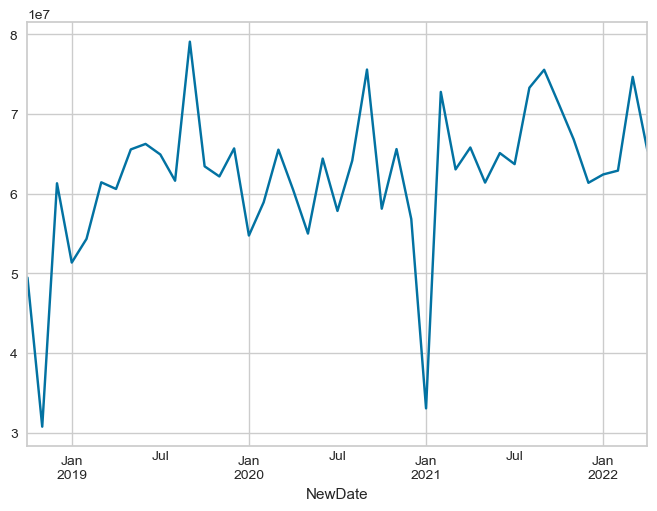

In [70]:
#What is the total Sales_EUR by newDate
training_set.groupby('NewDate')['Sales_EUR'].sum().plot()

In [71]:
sales_by_month = training_set.groupby('NewDate')['Sales_EUR'].sum()
sales_by_month     

NewDate
2018-10   49471370.83
2018-11   30760578.47
2018-12   61312068.79
2019-01   51360149.23
2019-02   54336933.67
2019-03   61435886.28
2019-04   60598035.44
2019-05   65563813.36
2019-06   66251932.08
2019-07   64925427.91
2019-08   61630019.14
2019-09   79087221.00
2019-10   63440758.36
2019-11   62168871.18
2019-12   65689212.91
2020-01   54752820.51
2020-02   58926297.86
2020-03   65532628.65
2020-04   60473324.95
2020-05   55001727.63
2020-06   64410726.64
2020-07   57838604.40
2020-08   64152808.89
2020-09   75588391.22
2020-10   58121991.70
2020-11   65603872.57
2020-12   56815684.33
2021-01   33057643.26
2021-02   72781252.24
2021-03   63055558.50
2021-04   65803190.42
2021-05   61399858.98
2021-06   65103351.13
2021-07   63716228.84
2021-08   73303028.73
2021-09   75559949.83
2021-10   71231256.10
2021-11   66824106.32
2021-12   61373034.62
2022-01   62420188.07
2022-02   62901069.54
2022-03   74671315.08
2022-04   65393111.01
Freq: M, Name: Sales_EUR, dtype: float64

In [72]:
# sales by product group (Mapped_GCK)
sales_by_prodgroup = training_set.groupby('Mapped_GCK')['Sales_EUR'].sum()
pd.options.display.float_format = '{:.2f}'.format
sales_by_prodgroup 

Mapped_GCK
#1    1544205996.76
#11     65901314.65
#12      8279486.32
#13      1009156.91
#14       493822.06
#16     18391175.71
#20        78326.86
#3     533443487.70
#36       998613.91
#4      15627204.96
#5     429595158.01
#6      20641890.49
#8      34871219.82
#9        308446.51
Name: Sales_EUR, dtype: float64

In [ ]:
# 0 e nao aparecer valor é igual
# slides - enfase na data preparation

In [ ]:
# removeram produtos dificeis de prever e faceis de prever

In [ ]:
# year end final de setembro, incentivo de fazer melhor no final (target and bonus), september wonder

In [ ]:
# os produtos n precisam de ser vendidos todos os dias ou até periodos

In [ ]:
# pode haver produtos descontinuados ou produtos q so comecaram a ser vendidos a meio

In [ ]:
# returns

# precos n mudam num tempo especifico

# varios tipos de descontos, por ex acumular e dps descontar

In [ ]:
# small specific datasets -> outperform

In [ ]:
# prever para cada produto num só notebook (siemens) (filip)

### Test Set 

In [73]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month Year  140 non-null    object 
 1   Mapped_GCK  140 non-null    object 
 2   Sales_EUR   0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 3.4+ KB


In [74]:
test_set.head()

,Month Year,Mapped_GCK,Sales_EUR
0,Mai 22,#3,NaN
1,Jun 22,#3,NaN
2,Jul 22,#3,NaN
3,Aug 22,#3,NaN
4,Sep 22,#3,NaN


In [75]:
# :>